In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\YASH KHADTARE\FERGUSSON\SEM 3\Final year Project\DATA.csv")

In [14]:
df.drop("Unnamed: 0", axis = 1 , inplace = True)

In [15]:
df.dropna(inplace = True)

<Axes: xlabel='rating_by_reviewer', ylabel='count'>

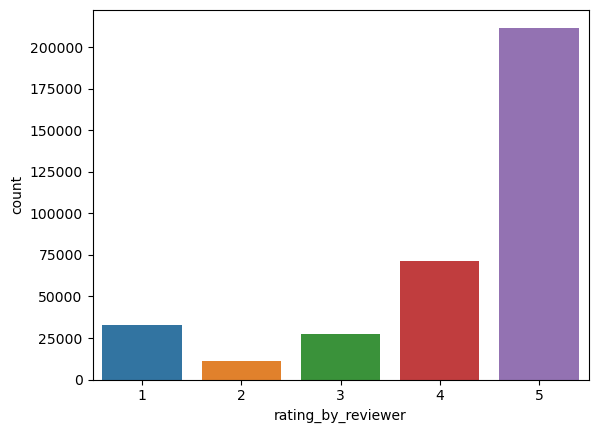

In [16]:
sns.countplot(df , x ='rating_by_reviewer')

In [17]:
df['rating_by_reviewer'].value_counts()

5    211741
4     71163
1     33124
3     27589
2     11143
Name: rating_by_reviewer, dtype: int64

# Common lengths of comments

In [18]:
length = [len(str(comment)) for comment in df['cleaned_review']]
length.sort()

In [19]:
import statistics

In [20]:
statistics.multimode(length)

[4]

In [21]:
length.count(4)

53163

# WE WILL CHOOSE RANDOM 25K COMMENTS OF EACH CLASS AND LABEL IT ON BASIS OF RATINGS

# so 4 and 5 = Positive class and 1 and 2 = negative class, we will not choose class 3 

# Here we use Random Sampling

In [22]:
star1 = df[['rating_by_reviewer','review','cleaned_review']][df['rating_by_reviewer']==1].sample(15000)
star2 = df[['rating_by_reviewer','review','cleaned_review']][df['rating_by_reviewer']==2].sample(10000)
star4 = df[['rating_by_reviewer','review','cleaned_review']][df['rating_by_reviewer']==4].sample(12500)
star5 = df[['rating_by_reviewer','review','cleaned_review']][df['rating_by_reviewer']==5].sample(12500)

In [23]:
labelling_data = pd.concat([star1,star2,star4,star5], axis = 0)
labelling_data

,rating_by_reviewer,review,cleaned_review
315391,1,second hand phone.... Delever to me...,second hand phone delever
258387,1,Very very.....bad.... product,verybad product
230263,1,Don't buy this phone guys ..I got a dust parti...,dont buy phone guy get dust particle camera le...
243290,1,I love pixel phone But this pixel is not good ...,love pixel phone pixel good hot issue phone ha...
15169,1,More heating.,heating
...,...,...,...
249439,5,"Futuristic phone , pretty fast , good config ,...",futuristic phone pretty fast good config dont ...
118088,5,Very nice phoneMust buy,nice phone must buy
61985,5,Nice product,nice product
261202,5,Masha Allah very nice and beautiful mobile pho...,masha allah nice beautiful mobile phone thanku...


In [24]:
labelling_data['rating_by_reviewer'].value_counts()

1    15000
4    12500
5    12500
2    10000
Name: rating_by_reviewer, dtype: int64

# Labelling DATA

In [25]:
def positive_negative_class(i):
    if i>=4:
        return "POSITIVE"
    else:
        return "NEGATIVE"

In [26]:
labelling_data['Sentiment'] = df['rating_by_reviewer'].apply(positive_negative_class)
labelling_data

,rating_by_reviewer,review,cleaned_review,Sentiment
315391,1,second hand phone.... Delever to me...,second hand phone delever,NEGATIVE
258387,1,Very very.....bad.... product,verybad product,NEGATIVE
230263,1,Don't buy this phone guys ..I got a dust parti...,dont buy phone guy get dust particle camera le...,NEGATIVE
243290,1,I love pixel phone But this pixel is not good ...,love pixel phone pixel good hot issue phone ha...,NEGATIVE
15169,1,More heating.,heating,NEGATIVE
...,...,...,...,...
249439,5,"Futuristic phone , pretty fast , good config ,...",futuristic phone pretty fast good config dont ...,POSITIVE
118088,5,Very nice phoneMust buy,nice phone must buy,POSITIVE
61985,5,Nice product,nice product,POSITIVE
261202,5,Masha Allah very nice and beautiful mobile pho...,masha allah nice beautiful mobile phone thanku...,POSITIVE


<Axes: xlabel='Sentiment', ylabel='count'>

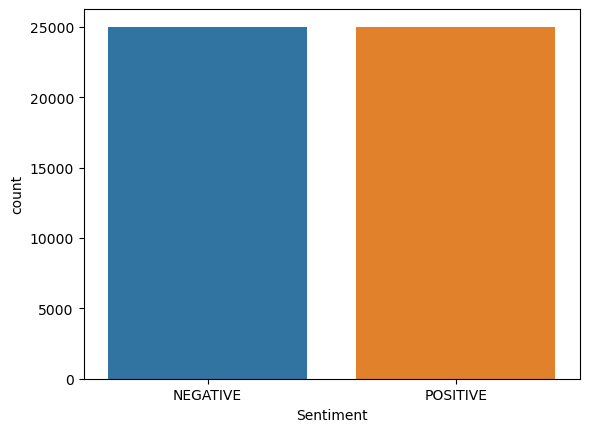

In [27]:
sns.countplot(labelling_data , x= 'Sentiment')

# HENCE WE ACQUIRED A BALANCED DATA

In [28]:
labelling_data.isnull().sum()

rating_by_reviewer    0
review                0
cleaned_review        0
Sentiment             0
dtype: int64

In [29]:
labelling_data.to_csv("labelled_data.csv")